<a href="https://colab.research.google.com/github/SQuinn314/ODELectures/blob/main/Lecture_Van_der_Pol_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Van der Pol Equation
A nonlinear variation of the harmonic oscillator (Spring Mass Equation) is $$ x'' + \mu (x^2 - 1) x' + x = 0$$ 
which has the nonlinear damping term $\mu (x^2 -1)$.  Note that when $x > 1$, there is damping, slowing the movement.  But when $x < 1$, this term is negative.  This is "pushing."

So, we should expect a repulsion away from the equilibrium at $x = 0, x' = 0$, but repulsion away.

To visualize this on the $(x,y)$-plane, we create the usual first-order system by defining $x = x$ and $y = x'$ and getting
$$\begin{cases} x' = y \\ y' = -x - \mu (x^2 -1) y \end{cases}$$


In [ ]:
#Important Packages
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.close_figures=False # keep figures open in pyplot

from scipy.integrate import odeint, solve_ivp

In [ ]:
# Adds a Vector Field to Axes.
def plot_VectorField(vf, vg, ax, 
                     left = 0,
                     right = 12.5, 
                     top = 12.5, 
                     bottom = 0,
                     scale = 5, 
                     width = 0.0015,
                     points=50): 
  #Create grid
  ax = ax or plt.gca()

  # First create list of points for the grid.
  # np.linspace(Left End Point, Right End Point, Number of Points)
  x = np.linspace(left, right, points)
  y = np.linspace(bottom, top, points)

  # This create an array of coordinates, with the given x coordinate and the given y coordinate.
  # They are repeated appropriately.
  X, Y = np.meshgrid(x, y)

  # Create a Quiver (Collection of direction vectors)
  u = vf(0, X, Y)
  v = vg(0, X,Y)

  # Normalize so everything is length 1.
  newu = u / np.sqrt(u**2 + v**2)
  newv = v / np.sqrt(u**2 + v**2)

  ax.quiver(
      x, y,           # Coordinates where there are arrows
      newu, newv,     # Directions of arrows
      angles = 'xy',  # Draws arrows from (x,y) to (x+u, y+v)
      scale_units='xy', scale= scale, width = .0015, # Arrow size settings 
      )
  return(ax)

# This function is used for the ODE solver, it uses f and g.
def dU_dt(U,t):
  x = U[0]
  y = U[1]
  xprime = f(t, x, y)
  yprime = g(t, x, y)
  return [xprime, yprime]

To create a vector field, we need the tangent vectors $T' = f(x,y) \vec{i} + g(x,y) \vec{j} = \langle f, g \rangle$.


In [ ]:
def f(t, x, y):
  return y

def g(t, x, y):
  return -x - mu*(x**2 - 1)*y

vf = np.vectorize(f)
vg = np.vectorize(g)

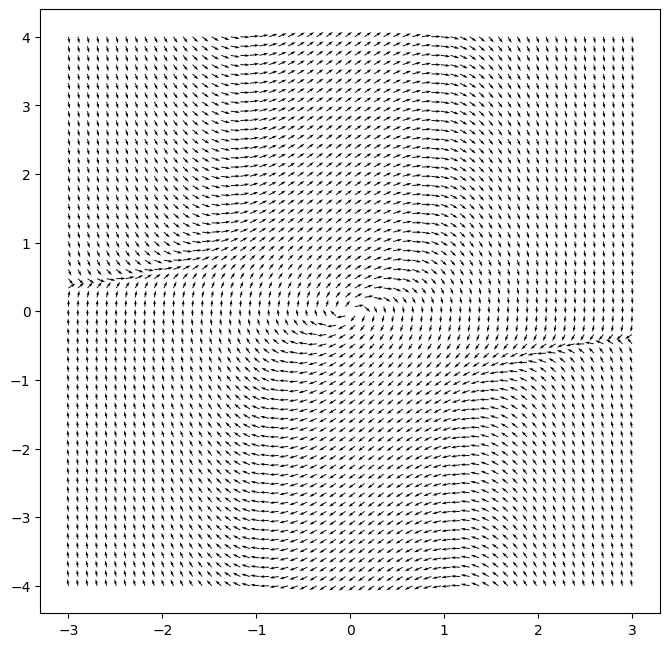

In [ ]:
# Parameters for the Model
mu = 1

# Plot the Vector Field
fig1, ax1 = plt.subplots(1)
fig1.set_size_inches(8,8)
fig1.set_dpi(100)

ax1 = plot_VectorField(vf, vg, ax1,
                       left = -3, right = 3,
                       bottom = -4, top = 4, 
                       scale = 10, points = 60)

fig1.show()

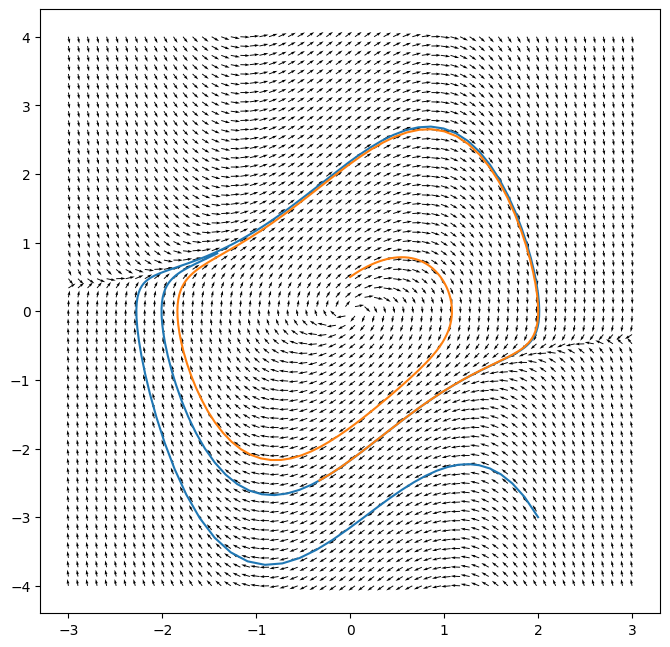

In [ ]:
# Add Trajectory to the canvas.
ts = np.linspace(0,10, 200)
U0 = [0,.5]  # Initial conditions (x0, y0)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
ys = Us[:,1]

ax1.plot(xs,ys)

fig1


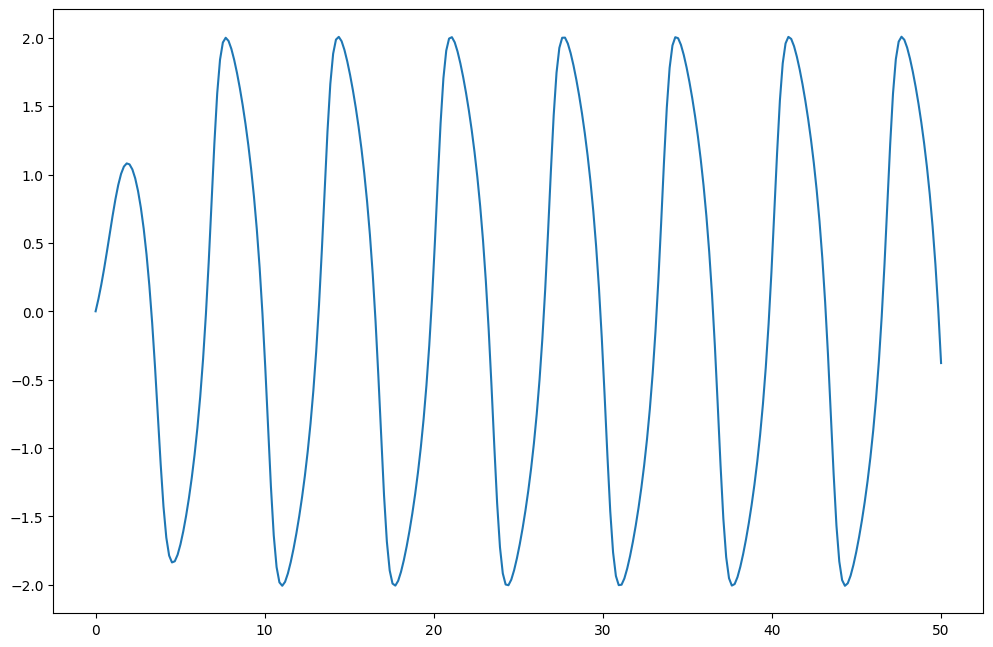

In [ ]:
ts = np.linspace(0,50, 300)
U0 = [0,.5]  # Initial conditions (x0, y0)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
ys = Us[:,1]


fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(12,8)
fig2.set_dpi(100)


ax2.plot(ts,xs)

fig2.show()